In [7]:
import pandas as pd
from pandas import Series
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize



In [8]:
data_path = "../data/processed/cyber_data.csv"
data = pd.read_csv(data_path)
data.head()

,intent,question,category
0,deepfake_purpose,What is the purpose of deepfakes?,deepfake
1,deepfake_purpose,Why were deepfakes created?,deepfake
2,deepfake_legality,Are deepfakes illegal?,deepfake
3,deepfake_legality,Can you get arrested for making deepfakes?,deepfake
4,deepfake_danger,Why are deepfakes dangerous?,deepfake


In [9]:
data.shape

(1035, 3)

# Exploratory Data Analysis

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   intent    1035 non-null   object
 1   question  1035 non-null   object
 2   category  1035 non-null   object
dtypes: object(3)
memory usage: 24.4+ KB


In [11]:
data['intent'].unique()

array(['deepfake_purpose', 'deepfake_legality', 'deepfake_danger',
       'deepfake_positive_use', 'deepfake_inventor',
       'deepfake_media_types', 'deepfake_famous_examples',
       'deepfake_realism', 'deepfake_real_time', 'deepfake_vs_cgi',
       'deepfake_ai_models', 'deepfake_programming',
       'deepfake_data_sources', 'deepfake_hardware',
       'deepfake_cybercrime', 'deepfake_identity_theft',
       'deepfake_detection', 'deepfake_misinformation', 'deepfake_laws',
       'cybersecurity_overview', 'malware_basics', 'ransomware_explained',
       'spyware_keyloggers', 'ddos_attacks', 'sql_injection_xss',
       'zero_day_exploits', 'security_best_practices',
       'password_security', 'authentication_methods', 'data_encryption',
       'network_security', 'firewalls_ids_ips', 'cloud_security',
       'iot_security', 'social_engineering', 'physical_security',
       'incident_response', 'digital_forensics', 'compliance_regulations',
       'cybersecurity_careers', 'threat_i

In [12]:
# Number of unique intents
len(data['intent'].unique())

62

In [13]:
# Distribution of question types (e.g., phishing, malware).
category_df = data['category'].value_counts().reset_index()
category_df

,category,count
0,general,560
1,malware,392
2,phishing,45
3,deepfake,38


<Axes: xlabel='count', ylabel='category'>

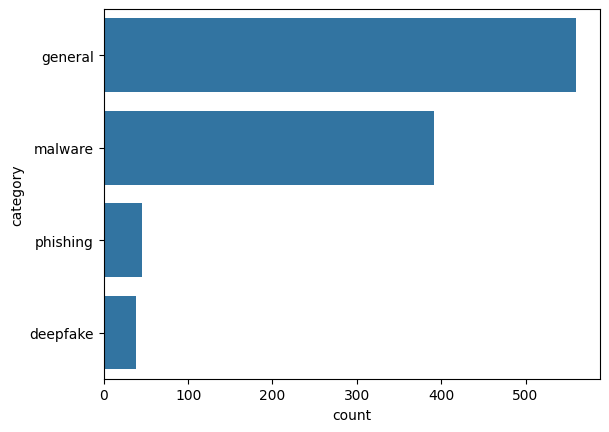

In [14]:
sns.barplot(data=category_df, x='count', y='category')

In [15]:
data['question'] = data['question'].astype(str)

In [16]:
def get_wordcount(text):
  return len(text.split())

In [17]:
data['question_length'] = data['question'].apply(lambda x : get_wordcount(x))
data.head()

,intent,question,category,question_length
0,deepfake_purpose,What is the purpose of deepfakes?,deepfake,6
1,deepfake_purpose,Why were deepfakes created?,deepfake,4
2,deepfake_legality,Are deepfakes illegal?,deepfake,3
3,deepfake_legality,Can you get arrested for making deepfakes?,deepfake,7
4,deepfake_danger,Why are deepfakes dangerous?,deepfake,4


In [18]:
# Average question lengths.
avg_qn_length = data['question_length'].mean()
print('Average question length : ', round(avg_qn_length, 2))

Average question length :  6.06


<Axes: ylabel='Frequency'>

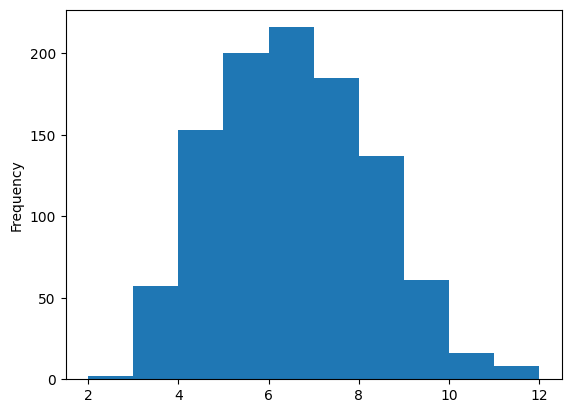

In [19]:
# Distribution of question lengths
data['question_length'].plot(kind = 'hist')

# Text Cleaning

In [35]:

stopwords_list = stopwords.words('english')

def remove_stopwords(text):
  word_list = [w for w in text.split() if w not in stopwords_list]
  return " ".join(word_list)

In [36]:
# Remove numbers
import re

def remove_nums(text):
  result = re.sub(r'\d+', '', text)
  return result

In [37]:
# Lowercase
def text_lowercase(text):
  return text.lower()

In [38]:
# Remove punctuations
string.punctuation

def remove_punctuation(text):
  translator = str.maketrans('', '', string.punctuation)
  return text.translate(translator)



In [39]:
def text_cleaning(text):
  text1 = text_lowercase(text)
  text2 = remove_stopwords(text1)
  text3 = remove_nums(text2)
  text4 = remove_punctuation(text3)
  return text4

In [40]:
data['clean_question'] = data['question'].apply(lambda x : text_cleaning(x))
data.head()

,intent,question,category,question_length,clean_question
0,deepfake_purpose,What is the purpose of deepfakes?,deepfake,6,purpose deepfakes
1,deepfake_purpose,Why were deepfakes created?,deepfake,4,deepfakes created
2,deepfake_legality,Are deepfakes illegal?,deepfake,3,deepfakes illegal
3,deepfake_legality,Can you get arrested for making deepfakes?,deepfake,7,get arrested making deepfakes
4,deepfake_danger,Why are deepfakes dangerous?,deepfake,4,deepfakes dangerous


# Most common words or phrases.

In [41]:

data['wordlist'] = data['clean_question'].apply(lambda x : x.split(" "))
data.head()

,intent,question,category,question_length,clean_question,wordlist
0,deepfake_purpose,What is the purpose of deepfakes?,deepfake,6,purpose deepfakes,"[purpose, deepfakes]"
1,deepfake_purpose,Why were deepfakes created?,deepfake,4,deepfakes created,"[deepfakes, created]"
2,deepfake_legality,Are deepfakes illegal?,deepfake,3,deepfakes illegal,"[deepfakes, illegal]"
3,deepfake_legality,Can you get arrested for making deepfakes?,deepfake,7,get arrested making deepfakes,"[get, arrested, making, deepfakes]"
4,deepfake_danger,Why are deepfakes dangerous?,deepfake,4,deepfakes dangerous,"[deepfakes, dangerous]"


In [42]:
from itertools import chain
wordlists = data['wordlist'].to_list()
complete_list = []
for wordlist in wordlists:
  for word in wordlist:
    complete_list.append(word)


In [43]:
from collections import Counter
word_count_dict = Counter(complete_list)


In [44]:
wordcount_df = pd.DataFrame({'Word' : list(word_count_dict.keys()), 'Frequency' :list(word_count_dict.values()) })
wordcount_df = wordcount_df.sort_values(['Frequency'], ascending=False)
top10 = wordcount_df.head(10)
top10

,Word,Frequency
137,ransomware,175
809,trojan,110
810,trojans,66
109,malware,62
25,work,61
120,happens,53
4,get,51
117,computer,51
72,cybersecurity,49
116,virus,47


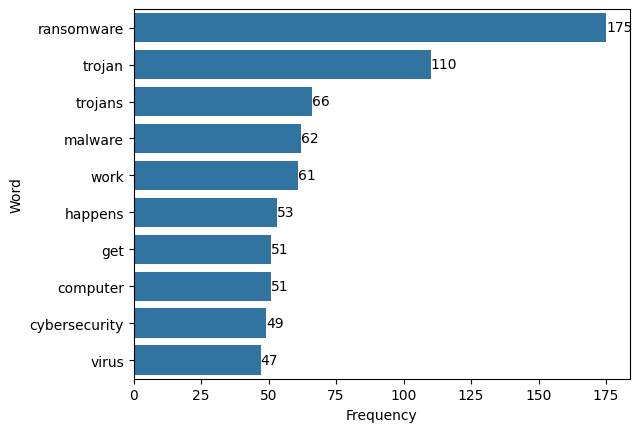

In [45]:
ax = sns.barplot(data = top10, y='Word', x='Frequency')
for i in ax.containers:
  ax.bar_label(i)